In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels. api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reading and understanding the data

In [3]:
bike=pd.read_csv('F:\\new\\python\\day.csv')
bike.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [251]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1]:
bike.describe()

NameError: name 'bike' is not defined

In [253]:
# Visualise the data

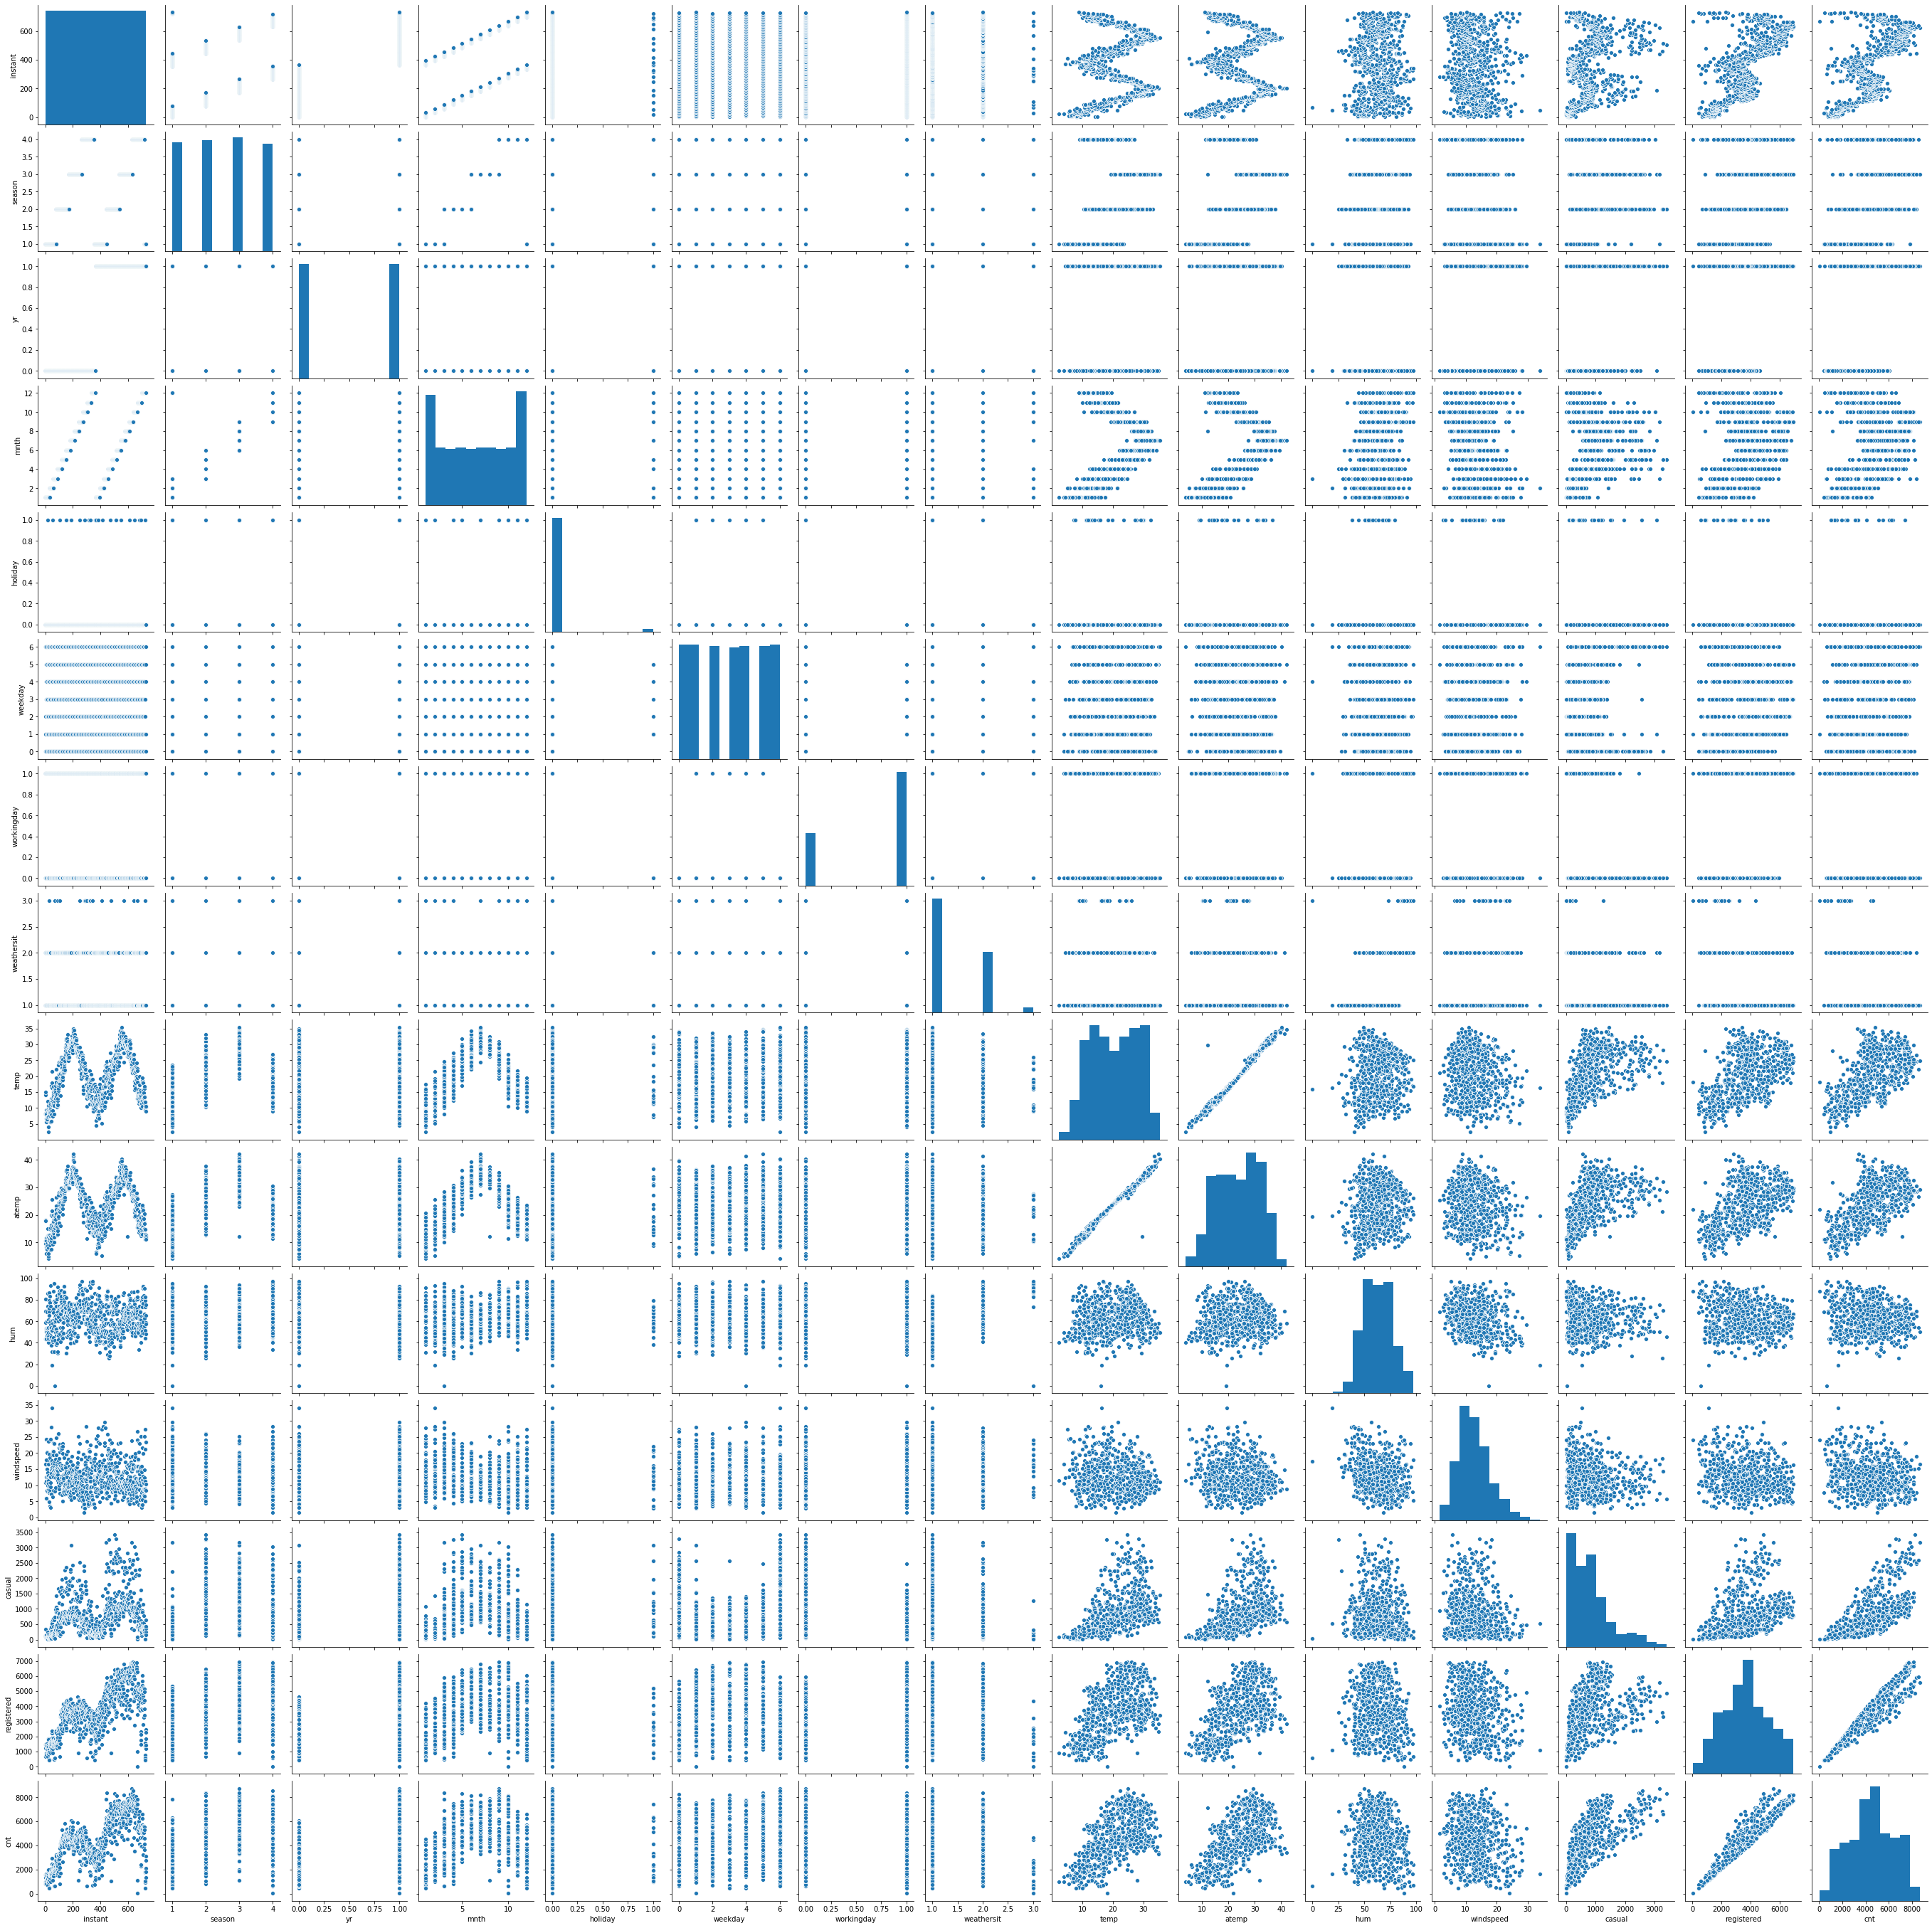

In [254]:
sns.pairplot(bike)
plt.show()

In [255]:
# Visualise the categorical variables

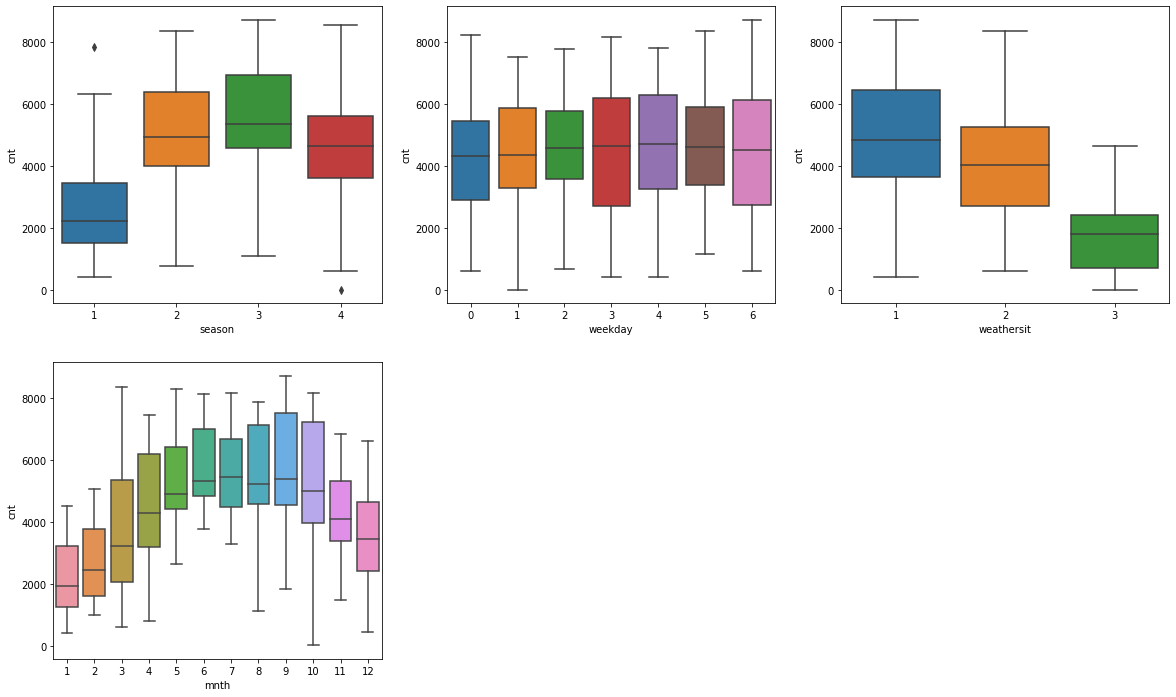

In [256]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(2,3,3)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.subplot(2,3,4)
sns.boxplot(x='mnth',y='cnt',data=bike)

# Preparing data for modeling

In [260]:
# Unnecessory variables drop 

In [261]:
bike=bike.drop('instant',axis=1)
bike.head()

KeyError: "['instant'] not found in axis"

In [259]:
bike=bike.drop('dteday',axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [160]:
bike=bike.drop('registered',axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1600


In [161]:
bike=bike.drop('casual',axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [162]:
bike=bike.drop('atemp',axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [163]:
# Create dummy variables for categorical features

In [164]:
new_season=pd.get_dummies(bike['season'],drop_first=True)
new_season=new_season.rename(columns={ 1: 'spring',
2:'summer',
3: 'fall',
4: 'winter'})
new_season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [165]:
bike=pd.concat([bike,new_season],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0


In [166]:
bike=bike.drop('season',axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0


In [167]:
new_weathersit=pd.get_dummies(bike['weathersit'],drop_first=True)
new_weathersit=new_weathersit.rename(columns={ 1: 'Clear',
2:' Mist + Cloudy',
3: 'Light Snow',
4: 'Heavy Rain'})
new_weathersit.head()

,Mist + Cloudy,Light Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [168]:
bike=pd.concat([bike,new_weathersit],axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter,Mist + Cloudy,Light Snow
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0


In [169]:
bike=bike.drop('weathersit',axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,Mist + Cloudy,Light Snow
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0


In [170]:
new_mnth=pd.get_dummies(bike['mnth'],drop_first=True)
new_mnth=new_mnth.rename(columns={1:'jan',2:'feb',3:'mar',4:'apr',
                                 5:'may',6:'june',7:'july',8:'aug',
                                 9:'sept',10:'oct',11:'nov',12:'dec'})
new_mnth.head()

,feb,mar,apr,may,june,july,aug,sept,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [171]:
bike=pd.concat([bike,new_mnth],axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,summer,...,mar,apr,may,june,july,aug,sept,oct,nov,dec
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
bike=bike.drop('mnth',axis=1)
bike.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,summer,fall,...,mar,apr,may,june,july,aug,sept,oct,nov,dec
0,0,0,6,0,14.110847,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
new_weekday=pd.get_dummies(bike['weekday'],drop_first=True)
new_weekday=new_weekday.rename(columns={1:'mon',2:'tue',3:'wed',4:'thu',
                                 5:'fri',6:'sat',7:'sun'})
new_weekday.head()

,mon,tue,wed,thu,fri,sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [174]:
bike=pd.concat([bike,new_weekday],axis=1)
bike.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,summer,fall,...,sept,oct,nov,dec,mon,tue,wed,thu,fri,sat
0,0,0,6,0,14.110847,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,14.902598,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,1,8.200000,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,3,1,9.305237,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [175]:
bike=bike.drop('weekday',axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,sept,oct,nov,dec,mon,tue,wed,thu,fri,sat
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [176]:
bike.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,sept,oct,nov,dec,mon,tue,wed,thu,fri,sat
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.252055,0.257534,0.243836,...,0.082192,0.084932,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.434490,0.437576,0.429689,...,0.274845,0.278971,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting in to train and test

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the variables

In [179]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [180]:
# instatiate the object
scaler=MinMaxScaler()

# create a list of numeric veriables
num_vars=['temp','hum','windspeed','holiday','workingday']
# fit on data,
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()


C:\Users\Prashant Shinde\OneDrive\Documents\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Prashant Shinde\OneDrive\Documents\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,sept,oct,nov,dec,mon,tue,wed,thu,fri,sat
653,1,0.0,1.0,0.509887,0.575354,0.300794,7534,0,0,1,...,0,1,0,0,0,1,0,0,0,0
576,1,0.0,1.0,0.815169,0.725633,0.264686,7216,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0.0,0.0,0.442393,0.640189,0.255342,4066,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0.0,0.0,0.245101,0.498067,0.663106,1796,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0.0,0.0,0.395666,0.504508,0.188475,4220,1,0,0,...,0,0,0,0,0,0,0,0,0,1


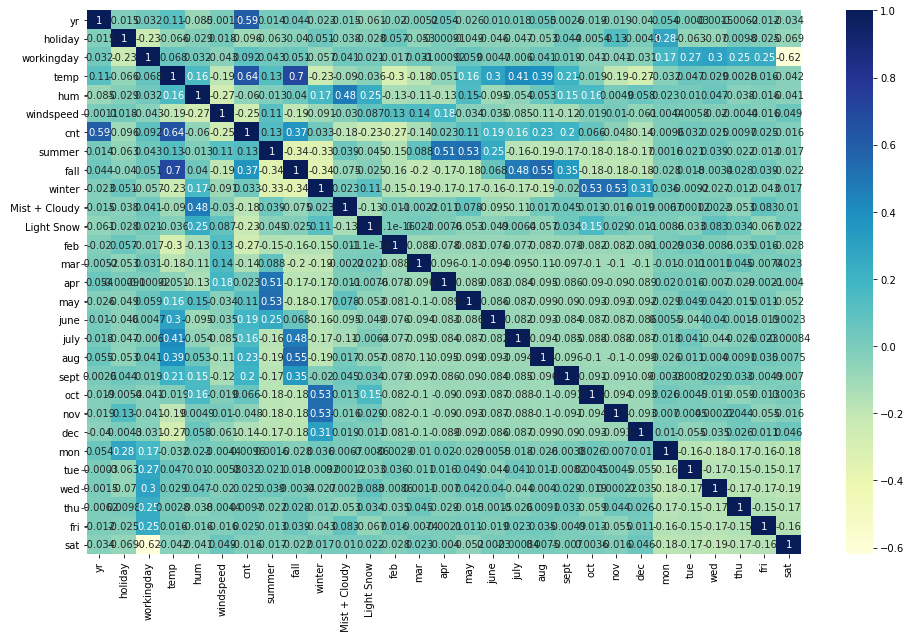

In [181]:
#heatamp
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [182]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,sept,oct,nov,dec,mon,tue,wed,thu,fri,sat
653,1,0.0,1.0,0.509887,0.575354,0.300794,7534,0,0,1,...,0,1,0,0,0,1,0,0,0,0
576,1,0.0,1.0,0.815169,0.725633,0.264686,7216,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0.0,0.0,0.442393,0.640189,0.255342,4066,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0.0,0.0,0.245101,0.498067,0.663106,1796,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0.0,0.0,0.395666,0.504508,0.188475,4220,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [183]:
y_train=df_train.pop('cnt')
x_train=df_train

In [184]:
# Building the model

# RFE

In [185]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [186]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm, 10)   
rfe = rfe.fit(x_train, y_train)

In [187]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 6),
 ('winter', True, 1),
 (' Mist + Cloudy', False, 2),
 ('Light Snow', True, 1),
 ('feb', False, 11),
 ('mar', False, 7),
 ('apr', False, 9),
 ('may', False, 8),
 ('june', False, 10),
 ('july', False, 12),
 ('aug', True, 1),
 ('sept', True, 1),
 ('oct', False, 5),
 ('nov', False, 13),
 ('dec', False, 14),
 ('mon', False, 15),
 ('tue', False, 16),
 ('wed', False, 18),
 ('thu', False, 19),
 ('fri', False, 17),
 ('sat', False, 3)]

In [188]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'Light Snow', 'aug', 'sept'],
      dtype='object')

In [189]:
x_train.columns[~rfe.support_]

Index(['workingday', 'fall', ' Mist + Cloudy', 'feb', 'mar', 'apr', 'may',
       'june', 'july', 'oct', 'nov', 'dec', 'mon', 'tue', 'wed', 'thu', 'fri',
       'sat'],
      dtype='object')

In [190]:
# Building model using statsmodel, for the detailed statistics

In [191]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [192]:
# Adding a constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [193]:
lm = sm.OLS(y_train,x_train_rfe).fit()

In [194]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.16e-186
Time:                        23:22:35   Log-Likelihood:                -4131.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2422.9806    227.261     10.662      0.0

In [231]:

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,summer,1.78
7,aug,1.57
5,winter,1.45
8,sept,1.29
6,Light Snow,1.06
1,holiday,1.04


In [232]:
# Residual analysis of the train test

In [233]:
y_train_price = lm.predict(x_train_lm)

ValueError: shapes (510,10) and (11,) not aligned: 10 (dim 1) != 11 (dim 0)

In [234]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

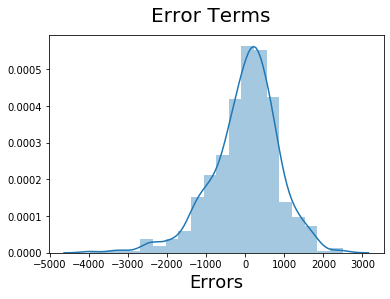

In [235]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)          
plt.xlabel('Errors', fontsize = 18)                     

# making prediction

In [241]:
num_vars = ['temp','hum','windspeed','holiday','workingday']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\Prashant Shinde\OneDrive\Documents\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prashant Shinde\OneDrive\Documents\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [243]:
y_test = df_test.pop('cnt')
x_test = df_test

KeyError: 'cnt'

In [244]:
# Now let's use our model to make predictions.
x_train_new=x_train_new.drop(['const'],axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

KeyError: "['const'] not found in axis"

In [245]:
# Making predictions
y_pred = lm.predict(x_test_new)

ValueError: shapes (219,10) and (11,) not aligned: 10 (dim 1) != 11 (dim 0)

In [246]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.773606426251615

Text(0, 0.5, 'y_pred')

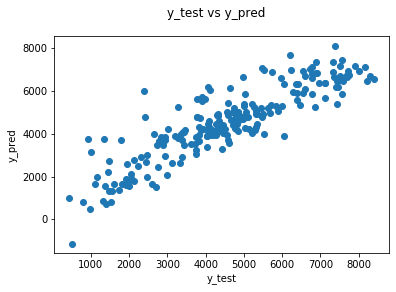

In [247]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred')   
plt.xlabel('y_test')                          
plt.ylabel('y_pred')                       